In [2]:
import scanpy as sc
adata_spatial = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
print(adata_spatial)

/tmp/ipykernel_1380934/2024658145.py:2: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata_spatial = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


/tmp/ipykernel_1380934/1330043254.py:5: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata_spatial = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_1380934/1330043254.py:12: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial

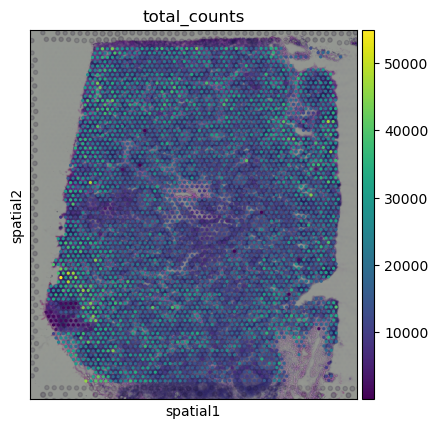

/tmp/ipykernel_1380934/1330043254.py:15: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_spatial, color=["n_genes_by_counts"])


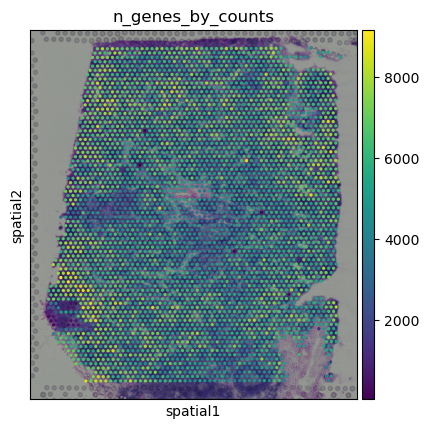

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load the dataset (if you haven't already)
adata_spatial = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")

# --- Step 1: Calculate QC Metrics ---
# This adds 'total_counts' and 'n_genes_by_counts' to adata_spatial.obs
sc.pp.calculate_qc_metrics(adata_spatial, inplace=True)

# --- Step 2: Re-run the Plot ---
sc.pl.spatial(adata_spatial, color=["total_counts"])

# Optional: Also visualize number of genes
sc.pl.spatial(adata_spatial, color=["n_genes_by_counts"])

plt.show() # Ensure plots are displayed

/tmp/ipykernel_1380934/1976025374.py:6: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata_spatial = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


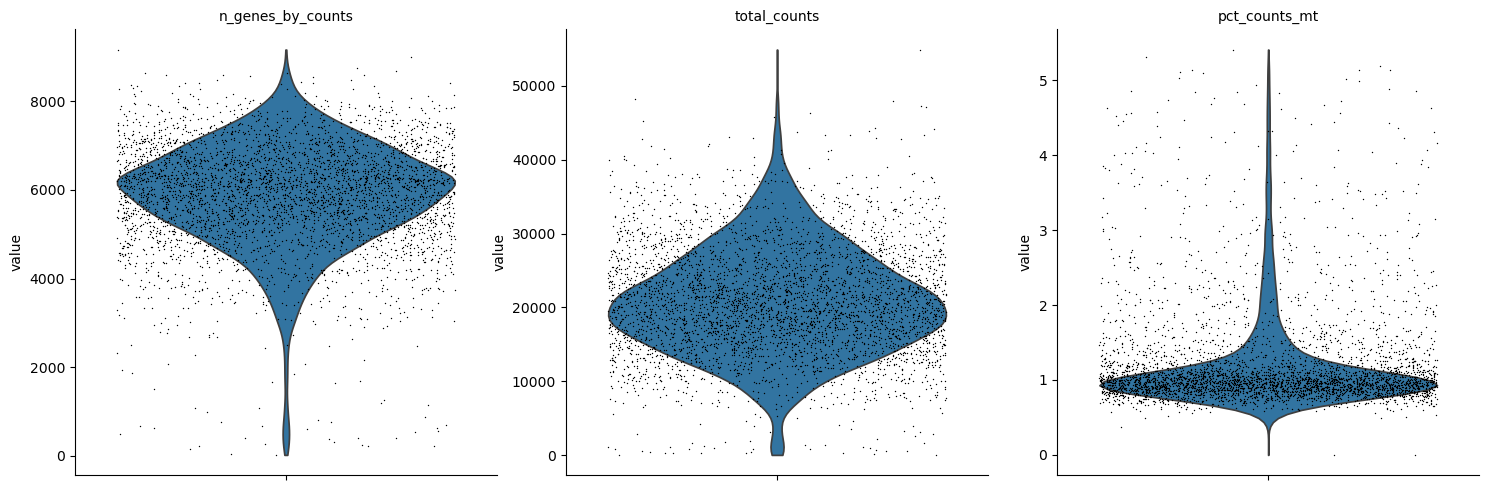

/tmp/ipykernel_1380934/1976025374.py:20: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_spatial, color=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])


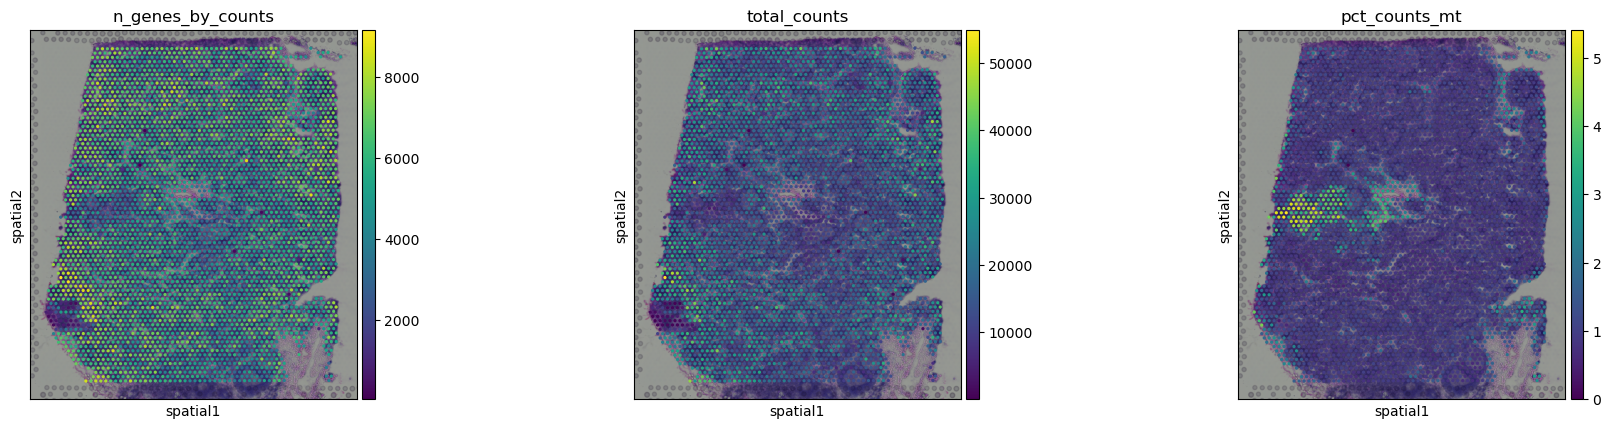

Spots before filtering: 4035


/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


Spots after filtering: 3895


In [4]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
adata_spatial = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")

adata_spatial.var_names_make_unique()

# Calculate mitochondrial percentage (optional, but good practice)
adata_spatial.var['mt'] = adata_spatial.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_spatial, qc_vars=['mt'], inplace=True, percent_top=None, log1p=False)

# --- Visualize QC Metrics ---
# This violin plot should work now
sc.pl.violin(adata_spatial, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# These spatial plots should also work
sc.pl.spatial(adata_spatial, color=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])

# Display the plots
plt.show()

# --- Apply Filters (code from previous step, run after visualizing) ---
# Example thresholds (adjust based on your plots)
print(f"Spots before filtering: {adata_spatial.n_obs}")
min_counts = 500
max_counts = 35000
min_genes = 200
max_mt_pct = 20

# Filter spots based on counts and genes
sc.pp.filter_cells(adata_spatial, min_counts=min_counts)
sc.pp.filter_cells(adata_spatial, min_genes=min_genes)
adata_spatial = adata_spatial[adata_spatial.obs.total_counts < max_counts, :]

# Filter spots based on mitochondrial percentage (if calculated)
if 'pct_counts_mt' in adata_spatial.obs.columns:
    adata_spatial = adata_spatial[adata_spatial.obs.pct_counts_mt < max_mt_pct, :]

# Filter genes expressed in few spots
sc.pp.filter_genes(adata_spatial, min_cells=10)

print(f"Spots after filtering: {adata_spatial.n_obs}")

In [5]:
# Normalize counts per spot to the median of total counts
sc.pp.normalize_total(adata_spatial, inplace=True)

# Log-transform the data
sc.pp.log1p(adata_spatial)

/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  return fn(*args_all, **kw)


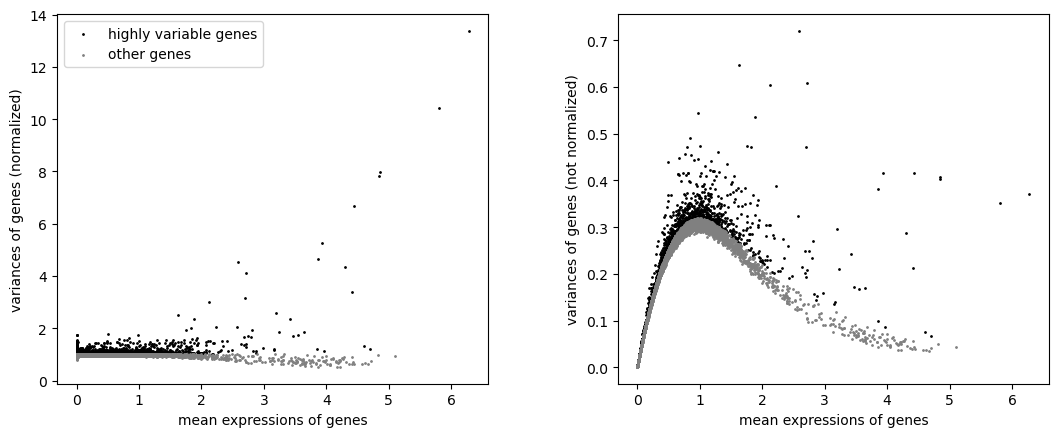

In [6]:
# Find highly variable genes
# Using flavor='seurat_v3' is often recommended for spatial data
sc.pp.highly_variable_genes(adata_spatial, flavor="seurat_v3", n_top_genes=3000)

# Plot HVGs
sc.pl.highly_variable_genes(adata_spatial)
plt.show() # Make sure the plot is displayed

/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/functools.py:907: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


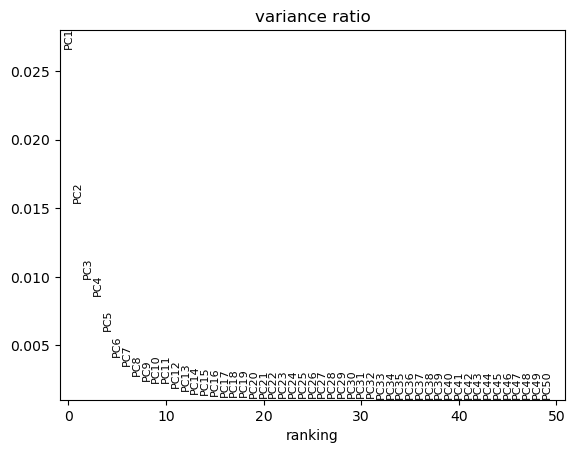

In [7]:
# Scale data (needed for PCA, but only use HVGs)
# Save the raw log-normalized data first
adata_spatial.raw = adata_spatial
# Subset to HVGs for scaling and PCA
adata_spatial_hvg = adata_spatial[:, adata_spatial.var.highly_variable].copy()
sc.pp.scale(adata_spatial_hvg, max_value=10) # Scale only HVGs

# Run PCA on the scaled HVG data
sc.tl.pca(adata_spatial_hvg)

# Copy PCA results back to the main object for downstream steps
adata_spatial.obsm['X_pca'] = adata_spatial_hvg.obsm['X_pca']

# Plot PCA variance ratio to decide on number of PCs
sc.pl.pca_variance_ratio(adata_spatial_hvg, n_pcs=50)
plt.show()

In [8]:
# Compute neighbors using a chosen number of PCs (e.g., 30)
# Adjust n_pcs based on your variance ratio plot
sc.pp.neighbors(adata_spatial, n_neighbors=15, n_pcs=30)

In [9]:
# Cluster the spots using Leiden algorithm
sc.tl.leiden(adata_spatial, resolution=0.5) # Adjust resolution as needed

/tmp/ipykernel_1380934/417714570.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_spatial, resolution=0.5) # Adjust resolution as needed


/tmp/ipykernel_1380934/1110821782.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_spatial, color="leiden", title="Spatial Clusters (Leiden)")


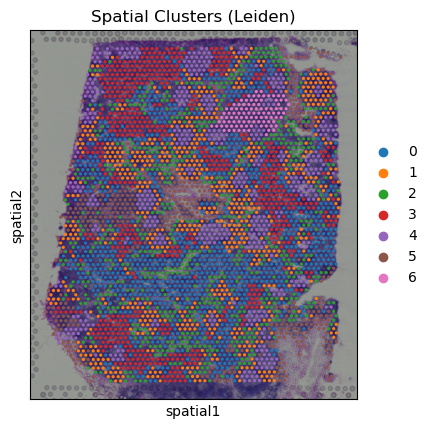

In [10]:
import matplotlib.pyplot as plt
import scanpy as sc

# Plot the Leiden clusters on the spatial coordinates
sc.pl.spatial(adata_spatial, color="leiden", title="Spatial Clusters (Leiden)")
plt.show()

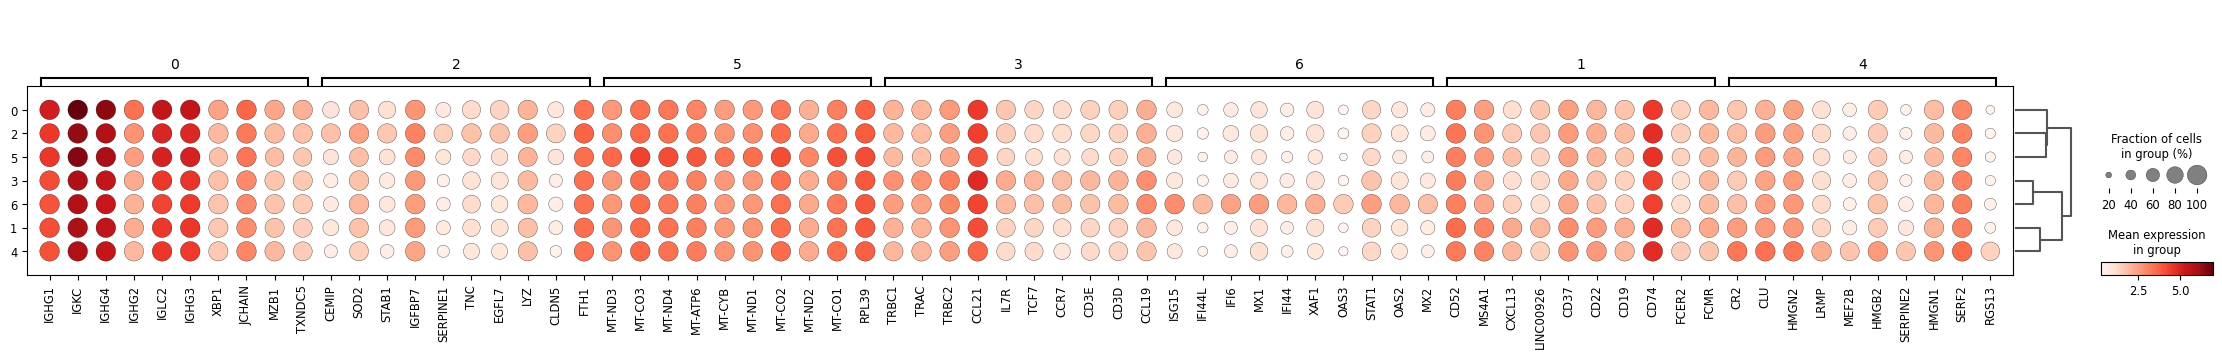

In [11]:
# Find marker genes for each spatial Leiden cluster
sc.tl.rank_genes_groups(adata_spatial, groupby='leiden', method='wilcoxon') # Wilcoxon is often preferred

# Visualize the top markers (e.g., dotplot or heatmap)
sc.pl.rank_genes_groups_dotplot(adata_spatial, n_genes=10) # Show top 10 markers per cluster
plt.show()

# You can also save the full marker list to a file
marker_df_spatial = sc.get.rank_genes_groups_df(adata_spatial, group=None)
marker_df_spatial.to_csv("spatial_cluster_markers.csv", index=False)

/tmp/ipykernel_1380934/3052835736.py:15: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_spatial, color=b_markers + t_markers + ifn_markers + follicle_marker,


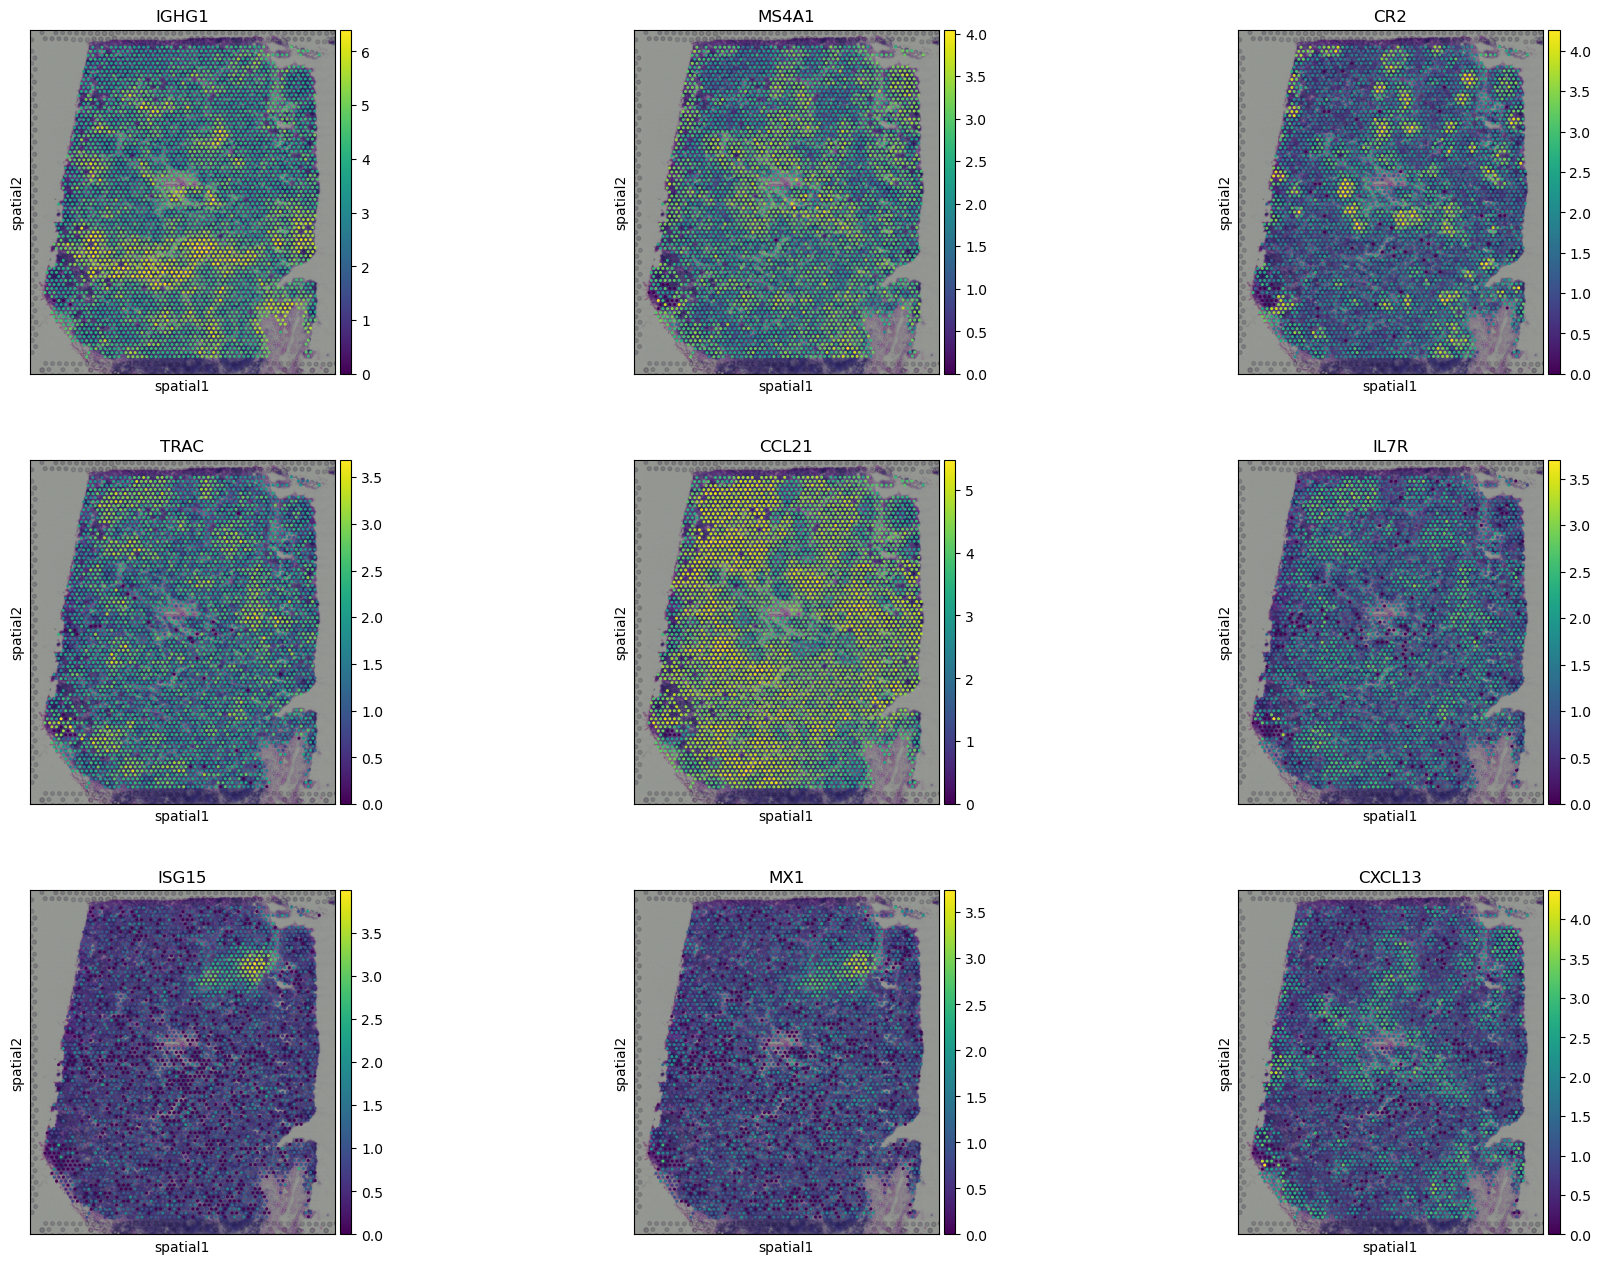

In [12]:
import matplotlib.pyplot as plt
import scanpy as sc

# Select key markers based on the dot plot analysis
# B-cell / Plasma cell markers
b_markers = ['IGHG1', 'MS4A1', 'CR2']
# T-cell markers
t_markers = ['TRAC', 'CCL21', 'IL7R']
# Interferon markers
ifn_markers = ['ISG15', 'MX1']
# Follicle marker
follicle_marker = ['CXCL13']

# Plot spatial expression
sc.pl.spatial(adata_spatial, color=b_markers + t_markers + ifn_markers + follicle_marker,
             cmap='viridis',  # Use a sequential colormap
             ncols=3)         # Arrange plots in columns
plt.show()

/tmp/ipykernel_1380934/3419965951.py:16: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_spatial, color='spatial_annotation', title='Annotated Spatial Regions')


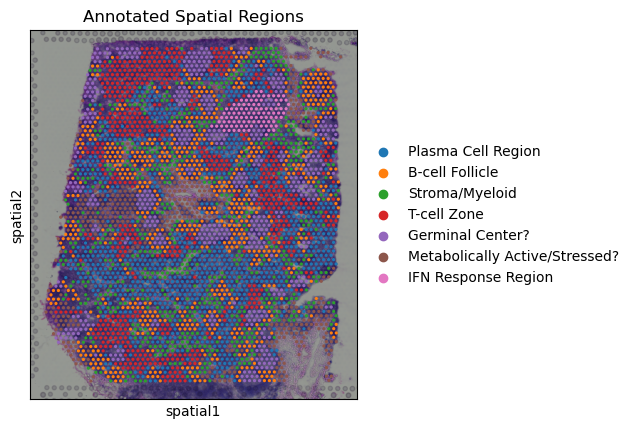

In [13]:
# Example mapping (REPLACE with your conclusions)
spatial_annotation_map = {
    '0': 'Plasma Cell Region',
    '1': 'B-cell Follicle',
    '2': 'Stroma/Myeloid',
    '3': 'T-cell Zone',
    '4': 'Germinal Center?', # Needs confirmation
    '5': 'Metabolically Active/Stressed?', # Needs confirmation
    '6': 'IFN Response Region'
}

# Add annotation to obs
adata_spatial.obs['spatial_annotation'] = adata_spatial.obs['leiden'].map(spatial_annotation_map).astype('category')

# Plot the annotated spatial regions
sc.pl.spatial(adata_spatial, color='spatial_annotation', title='Annotated Spatial Regions')
plt.show()

/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


  0%|          | 0/1000 [00:00<?, ?/s]

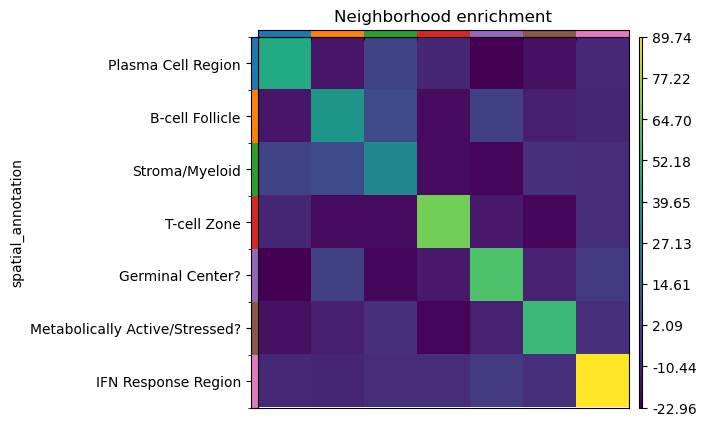

In [14]:
import squidpy as sq

# Calculate neighborhood enrichment
sq.gr.spatial_neighbors(adata_spatial) # Calculate spatial graph first
sq.gr.nhood_enrichment(adata_spatial, cluster_key="spatial_annotation")

# Plot the enrichment heatmap
sq.pl.nhood_enrichment(adata_spatial, cluster_key="spatial_annotation")
plt.show()

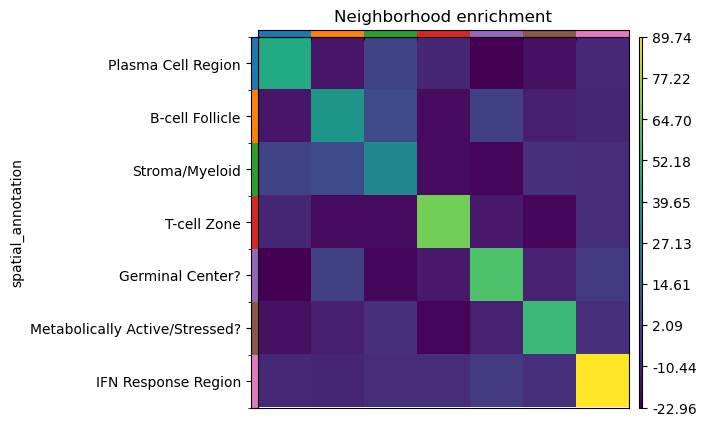

In [15]:
# Plot again to save
sq.pl.nhood_enrichment(adata_spatial, cluster_key="spatial_annotation", save="_nhood_enrichment.pdf")
# Enrichment scores are in adata_spatial.uns['nhood_enrichment']['zscore']
# You can save this DataFrame if needed
# enrichment_df = adata_spatial.uns['nhood_enrichment']['zscore']
# enrichment_df.to_csv("neighborhood_enrichment_zscores.csv")

In [16]:
adata_spatial.write_h5ad("human_lymph_node_spatial_annotated.h5ad")

In [17]:
# Rerun spatial neighbors just in case (if not already done)
try:
    import squidpy as sq
    sq.gr.spatial_neighbors(adata_spatial)
    print("Spatial graph confirmed.")
except ImportError:
    print("Squidpy is not installed. Please install it: pip install squidpy")
    # Stop execution if squidpy is needed and not installed.
    raise

# Check annotations
if 'spatial_annotation' not in adata_spatial.obs.columns:
    print("Error: 'spatial_annotation' column not found. Please run the annotation step first.")
    # Stop execution if annotations are missing.
    raise Exception("Annotations missing")

Spatial graph confirmed.


In [18]:
import pandas as pd
# Get the spatial connectivity matrix (shows which spots are neighbors)
connectivities = adata_spatial.obsp['spatial_connectivities']

# Get the cell type annotation for each spot
annotations = adata_spatial.obs['spatial_annotation']

# Find pairs of adjacent spots with different annotations
source_indices, target_indices = connectivities.nonzero()
adjacent_pairs = set()

print("Finding adjacent cell type pairs...")
for i, j in zip(source_indices, target_indices):
    # Ensure spots are different and have valid annotations
    if i < j: # Avoid double counting and self-loops
        source_type = annotations.iloc[i]
        target_type = annotations.iloc[j]
        if pd.notna(source_type) and pd.notna(target_type):
             # Add both directions (TypeA -> TypeB and TypeB -> TypeA)
            if source_type != target_type:
                adjacent_pairs.add(tuple(sorted((source_type, target_type))))


# Convert the set of unique pairs for easier checking
print(f"Found {len(adjacent_pairs)} unique adjacent region pairs.")
# Example: {('T-cell Zone', 'B-cell Follicle'), ('Plasma Cell Region', 'B-cell Follicle'), ...}

Finding adjacent cell type pairs...
Found 21 unique adjacent region pairs.


In [19]:
import scipy.sparse
import numpy as np
import scanpy as sc # Make sure scanpy is imported

# Determine which object to use for LIANA
adata_target = None # Initialize

# Check if the layer exists, create if not
if 'normalized_counts' not in adata_spatial.layers:
    print("Preparing 'normalized_counts' layer for spatial data...")
    if adata_spatial.raw is not None:
        log_counts = adata_spatial.raw.X
        if log_counts.shape == adata_spatial.shape: # Check if raw matches current shape
             if scipy.sparse.issparse(log_counts):
                 normalized_counts = log_counts.expm1()
             else:
                 normalized_counts = np.expm1(log_counts)
             adata_spatial.layers['normalized_counts'] = normalized_counts
             adata_target = adata_spatial # Use the main spatial object
             print("Created 'normalized_counts' layer in adata_spatial.")
        else:
             # If shapes mismatch, create a new object from .raw
             print("Shape mismatch. Creating a new object from adata_spatial.raw for LIANA...")
             adata_spatial_liana = adata_spatial.raw.to_adata()
             adata_spatial_liana.obs['spatial_annotation'] = adata_spatial.obs['spatial_annotation'] # Copy spatial labels
             log_counts = adata_spatial_liana.X
             if scipy.sparse.issparse(log_counts):
                 normalized_counts = log_counts.expm1()
             else:
                 normalized_counts = np.expm1(log_counts)
             adata_spatial_liana.layers['normalized_counts'] = normalized_counts
             adata_target = adata_spatial_liana # Use this new object going forward
             print("Created adata_spatial_liana for CCC.")
    else:
        print("ERROR: Cannot find log1p data in adata_spatial.raw to create normalized_counts layer.")
        raise ValueError("Missing raw data")
else:
    print("'normalized_counts' layer already exists.")
    adata_target = adata_spatial # Use the main spatial object if layer exists

# --- Now check annotations on the correctly assigned adata_target ---
if adata_target is None:
     print("ERROR: adata_target was not assigned properly.")
     raise ValueError("adata_target not defined")
elif 'spatial_annotation' not in adata_target.obs.columns:
     print("ERROR: 'spatial_annotation' column is missing from the target AnnData object.")
     raise KeyError("Missing spatial_annotation")
else:
     print("Checks passed. `adata_target` is ready for LIANA.")

Preparing 'normalized_counts' layer for spatial data...
Created 'normalized_counts' layer in adata_spatial.
Checks passed. `adata_target` is ready for LIANA.


In [20]:
from liana.method import cellphonedb
import liana.pl as lipl

print("Running LIANA analysis using spatial annotations...")
results_spatial = cellphonedb(
    adata_target, # Use the object defined above
    groupby='spatial_annotation',
    layer='normalized_counts',
    use_raw=False,
    resource_name='cellphonedb',
    verbose=True,
    inplace=False
)
adata_target.uns['liana_spatial_res'] = results_spatial
print("Spatial LIANA analysis finished.")

# (Rest of the filtering and plotting code follows...)

Using resource `cellphonedb`.


Running LIANA analysis using spatial annotations...


Using the `normalized_counts` layer!
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/liana/method/_pipe_utils/_pre.py:149: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.24 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 3895 samples and 639 features


100%|██████████| 1000/1000 [00:07<00:00, 140.93it/s]


Spatial LIANA analysis finished.


In [21]:
import liana.pl as lipl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Import for plt.show()

# --- Retrieve and Filter the Results ---
results_key = 'liana_spatial_res'
if results_key not in adata_target.uns:
    print(f"ERROR: Results key '{results_key}' not found in adata_target.uns.")
    raise KeyError(f"Results key '{results_key}' not found.")

results_spatial = adata_target.uns[results_key].copy()
results_spatial_sorted = results_spatial.sort_values(by='cellphone_pvals', ascending=True)
top_spatial_interactions = results_spatial_sorted.head(50)

if top_spatial_interactions.empty:
    print("No significant interactions found between spatial regions to plot.")
else:
    # --- Prepare for plotting ---
    top_spatial_interactions['-log10_pval'] = -np.log10(top_spatial_interactions['cellphone_pvals'] + 1e-10)

    # --- Plot the results (Assign to 'p') ---
    print("Plotting top spatial CCC results (basic)...")
    p = lipl.dotplot( # Assign the plot object to 'p'
        liana_res=top_spatial_interactions,
        colour='lr_means',
        size='-log10_pval',
        figure_size=(12, 7)
    )

    # --- Display the plot ---
    print(p) # Print the plotnine object to render it
    plt.show() # Ensure display

    # --- Save the plot as PNG (using the plot object 'p') ---
    plot_filename_png = "spatial_ccc_dotplot.png"
    try:
        p.save(plot_filename_png, dpi=300) # Save as PNG with 300 DPI
        print(f"Spatial CCC dot plot saved as PNG to: {plot_filename_png}")
    except Exception as e:
        print(f"Could not save plot automatically. Error: {e}")
        print("You might need to manually save the plot image from the notebook output.")
    # --- ---

    # --- Save the filtered results table ---
    table_filename = "top_50_spatial_ccc_interactions.tsv"
    top_spatial_interactions.to_csv(table_filename, sep='\t', index=False)
    print(f"Top 50 spatial interactions saved to {table_filename}")

    # --- Save the final spatial object ---
    final_spatial_object_to_save = adata_target if 'adata_target' in locals() and adata_target is not adata_spatial else adata_spatial
    final_spatial_object_to_save.write_h5ad("human_lymph_node_spatial_annotated.h5ad")
    print("Final annotated spatial object saved.")

Plotting top spatial CCC results (basic)...


/tmp/ipykernel_1380934/1280590939.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ggplot: (1200 x 700)>


/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 12 x 7 in image.
/home/ibab/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: spatial_ccc_dotplot.png


Spatial CCC dot plot saved as PNG to: spatial_ccc_dotplot.png
Top 50 spatial interactions saved to top_50_spatial_ccc_interactions.tsv
Final annotated spatial object saved.
